IMPORTAZIONE LIBRERIE

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [39]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


PATH PER ANALISI SUL VOLO M1 NO FAULT

In [40]:
path_cartella_NoFaultM1 = r"\M1\NO_FAULT1"

path_NoFaultM1 = path_file + path_cartella_NoFaultM1

print(path_NoFaultM1)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\NO_FAULT1


In [41]:
att = pd.read_csv(path_NoFaultM1+"\ATT.csv")
att = att.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att)

      LineNo    TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0        188  15037193      0.0 -0.08       0.0  -0.60   17.24  11.69
1        291  15071127      0.0 -0.08       0.0  -0.60   23.31  11.71
2        633  15133024      0.0 -0.07       0.0  -0.60   31.41  11.73
3        746  15149226      0.0 -0.07       0.0  -0.60   33.44  11.74
4        859  15164706      0.0 -0.07       0.0  -0.60   35.46  11.74
...      ...       ...      ...   ...       ...    ...     ...    ...
6729  301652  87102709      0.0  1.49       0.0   1.36    2.88   2.86
6730  301696  87113111      0.0  1.51       0.0   1.35    2.89   2.87
6731  301741  87123756      0.0  1.53       0.0   1.35    2.90   2.88
6732  301789  87136641      0.0  1.56       0.0   1.35    2.91   2.89
6733  301833  87147394      0.0  1.57       0.0   1.35    2.91   2.89

[6734 rows x 8 columns]


In [42]:
ctun = pd.read_csv(path_NoFaultM1+"\CTUN.csv")
ctun = ctun.drop(['ThI', 'ABst', 'ThO', 'ThH', 'DAlt', 'BAlt', 'DSAlt', 'SAlt', 'TAlt', 'DCRt', 'CRt'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(ctun)

     LineNo    TimeUS       Alt
0      1911  15489852 -0.090936
1      2324  15590264  0.058386
2      2738  15691546  0.166297
3      3152  15792092  0.249089
4      3531  15893068  0.315913
..      ...       ...       ...
681  299665  86646556  0.001581
682  300113  86750662  0.003942
683  300566  86851725  0.004179
684  301015  86958026  0.004310
685  301467  87060691  0.002020

[686 rows x 3 columns]


In [67]:
esc_0 = pd.read_csv(path_NoFaultM1+"\ESC_0.csv")
esc_0 = esc_0.drop(['Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(esc_0)

     LineNo    TimeUS  RPM  Curr
0      1775  15447273    0  0.03
1      2198  15558894    0  0.03
2      2615  15661687    0  0.03
3      3027  15762032    0  0.03
4      3481  15876003    0  0.02
..      ...       ...  ...   ...
638  299250  86543842    0  0.02
639  299704  86649555    0  0.02
640  300608  86858026    0  0.02
641  301101  86973845    0  0.02
642  301553  87075668    0  0.02

[643 rows x 4 columns]


In [68]:
esc_0['TimeUS'].isin(att['TimeUS']).value_counts()

False    643
Name: TimeUS, dtype: int64

In [73]:
imu_2 = pd.read_csv(path_NoFaultM1+"\IMU_2.csv")
imu_2 = imu_2.drop(['I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(imu_2)

       LineNo    TimeUS      GyrX      GyrY      GyrZ      AccX      AccY  \
0         187  15037020  0.000742 -0.003343 -0.002607 -0.172380  0.186636   
1         218  15039579  0.000256 -0.002747 -0.002662 -0.172797  0.186337   
2         290  15071017  0.002162 -0.000720  0.002033 -0.173068  0.187550   
3         321  15073159 -0.000290 -0.002141  0.001794 -0.173703  0.189283   
4         401  15090845  0.003664  0.000311  0.001631 -0.162369  0.217335   
...       ...       ...       ...       ...       ...       ...       ...   
26157  301785  87130939  0.044020 -0.001034  0.010834  0.192747  0.056762   
26158  301788  87136270  0.036010  0.003350  0.008688  0.222888 -0.005297   
26159  301823  87141750  0.021079 -0.002291  0.009566  0.238064 -0.103092   
26160  301826  87145044  0.017170 -0.001381  0.008922  0.232499 -0.124695   
26161  301832  87147030  0.011452  0.001690  0.008913  0.213301 -0.143005   

           AccZ  
0     -9.805696  
1     -9.809807  
2     -9.842299  
3  

C:\Users\chiar\AppData\Local\Temp\ipykernel_28456\176955277.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(ys, labels = ['Pitch', 'DesPitch'])


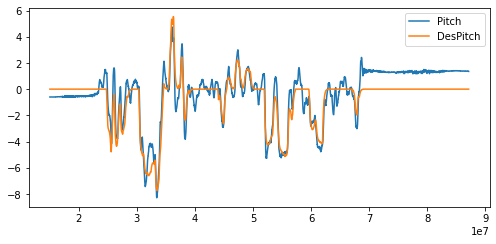

In [46]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = att.TimeUS
ys = [att.Pitch, att.DesPitch]
for y in ys:
    plt.plot(xs, y)

plt.legend(ys, labels = ['Pitch', 'DesPitch'])

plt.show()


#plt.plot(att.TimeUS, [att.Pitch, att.DesPitch])

PATH PER ANALISI SUL VOLO M1 FAULT 5%

In [29]:
path_cartella_FaultM1_5 = r"\M1\FAULT_M1_5"

path_FaultM1_5 = path_file + path_cartella_FaultM1_5

print(path_FaultM1_5)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\FAULT_M1_5


In [48]:
att_M1_5 = pd.read_csv(path_FaultM1_5+"\ATT.csv")
att_M1_5 = att_M1_5.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att_M1_5)

       LineNo     TimeUS  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw
0         296   19491757     0.00   1.99       0.0   1.11   24.51   24.49
1         640   19557820     0.00   2.00       0.0   1.11   24.54   24.51
2         867   19603142     0.00   1.99       0.0   1.11   24.56   24.53
3        1209   19764173     0.00   1.99       0.0   1.11   24.61   24.58
4        1485   19834986     0.00   1.99       0.0   1.11   24.63   24.61
...       ...        ...      ...    ...       ...    ...     ...     ...
16589  729686  303339533     0.01  47.85       0.0  -9.05  291.45  290.94
16590  729731  303349822     0.01  47.70       0.0  -8.94  291.63  291.13
16591  729776  303360448     0.01  47.53       0.0  -8.83  291.81  291.31
16592  729820  303370367     0.01  47.37       0.0  -8.72  291.96  291.46
16593  729864  303380776     0.01  47.22       0.0  -8.62  292.10  291.59

[16594 rows x 8 columns]


C:\Users\chiar\AppData\Local\Temp\ipykernel_28456\2988800021.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(ys, labels = ['Pitch_5', 'DesPitch_5'])


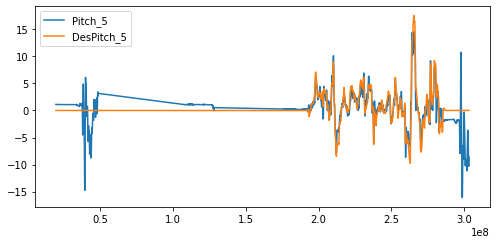

In [50]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = att_M1_5.TimeUS
ys = [att_M1_5.Pitch, att_M1_5.DesPitch]
for y in ys:
    plt.plot(xs, y)

plt.legend(ys, labels = ['Pitch_5', 'DesPitch_5'])

plt.show()

PATH PER ANALISI SUL VOLO M1 FAULT 10%

In [52]:
path_cartella_FaultM1_10 = r"\M1\FAULT_M1_10"

path_FaultM1_10 = path_file + path_cartella_FaultM1_10

print(path_FaultM1_10)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\FAULT_M1_10


In [53]:
att_M1_10 = pd.read_csv(path_FaultM1_10+"\ATT.csv")
att_M1_10 = att_M1_10.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att_M1_10)

       LineNo      TimeUS  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw
0         296  1641888579     0.00  -1.45      0.00   1.72   46.68   19.61
1         524  1641935066     0.00  -1.46      0.00   1.72   46.70   19.62
2         976  1642041330     0.00  -1.45      0.00   1.73   46.75   19.62
3        1090  1642080766     0.00  -1.45      0.00   1.73   46.77   19.62
4        1197  1642157259     0.00  -1.45      0.00   1.73   46.80   19.63
...       ...         ...      ...    ...       ...    ...     ...     ...
12290  548111  1776637333     0.01  71.15      0.00  47.54  253.27  256.45
12291  548153  1776647407     0.00  71.08      0.00  47.26  253.12  256.13
12292  548199  1776657358     0.00  71.03      0.01  46.99  252.97  255.84
12293  548241  1776667906     0.00  71.00      0.01  46.72  252.83  255.57
12294  548283  1776678436     0.00  70.99      0.01  46.43  252.68  255.27

[12295 rows x 8 columns]


C:\Users\chiar\AppData\Local\Temp\ipykernel_28456\774738945.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(ys, labels = ['Pitch_10', 'DesPitch_10'])


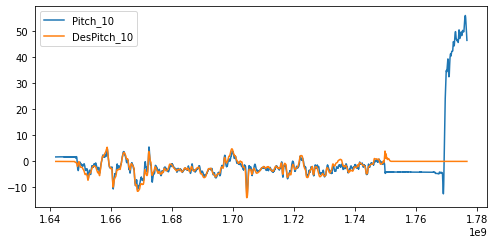

In [54]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = att_M1_10.TimeUS
ys = [att_M1_10.Pitch, att_M1_10.DesPitch]
for y in ys:
    plt.plot(xs, y)

plt.legend(ys, labels = ['Pitch_10', 'DesPitch_10'])

plt.show()